<a href="https://colab.research.google.com/github/Hasanen99/ML-Homeworks-AIDOJO/blob/main/Assignments_3_Hasanen_A_Sahib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03: Machine Learning 

This week's assignment is to prepare a dataset and train a Machine Learning algorithm on the dataset to accurately predict **median house value**.
 

Before starting copy this file and work on your own copy by going to `File > Save Copy in Drive.` Then add your name to the file (e.g., Assignment 03: Machine Learning - Muntadher Alkaabi).

 

Submission Deadline: **Thursday, 2/3/2022 at 3:00 PM**

 

**Requirements:**


	
	
1. Import necessary libraries for the machine learning project.
	
	
	
2. Read and apply necessary preprocessing steps on the dataset:
    1. Drop the following columns (`longitude`, `latitude`)
		
	2. Convert the words in the `ocean_proximity` column to numeric values.
		
	3. Normalize the dataset (make sure to print info and descriptions with the histogram for the dataset).
		
	
	
	
3. Split the dataset using a 80/20 training/testing split (don't forget to set the `random_state` to 42).
	
	
	
4. Create and train 4 Machine Learning models.
	
	
	
5. Use the right evaluation metrics to choose the best model (write down your choice for the best model).
	


**Note:** To get the best performance from model, manually tune the hyperparameters of each model.

 

Find relevant links below: 

[Dataset](https://docs.google.com/spreadsheets/d/1bc0on1l8EUUPXyzTV3A09Dj07uzZAy88wSU8SoxRBGo/edit?usp=sharing)

[Submission Form](https://forms.gle/rqv8KrFTfudR2QXX9)
 

Good luck and feel free to ask any questions in the comments or on the Questions channel.

# Upload the dataset

In [ ]:
import pandas as pd
sheet_url='https://docs.google.com/spreadsheets/d/1bc0on1l8EUUPXyzTV3A09Dj07uzZAy88wSU8SoxRBGo/edit#gid=1372316862'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
main_df=pd.read_csv(url_1)

# Import necessary libraries for the machine learning project.

In [ ]:
# write your code here.
from sklearn import preprocessing,model_selection,metrics,svm,linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import matplotlib.pyplot as plt


# Read and apply necessary preprocessing steps on the dataset

In [ ]:
# print the head of the data 
main_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# print the describe of the dataframe 
main_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# print the info of the dataframe
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# drop the longitude, latitude columns 
main_df.drop(['latitude','longitude'],axis=1,inplace=True)
main_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,18,697,150.0,356,114,2.5568,77100,INLAND
20637,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,18,1860,409.0,741,349,1.8672,84700,INLAND


In [ ]:
# print the info of the dataframe
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  int64  
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [ ]:
# count how many nan values are in the dataframe
main_df.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# fill the nan values with the mean of the 
main_df['total_bedrooms'].fillna(main_df['total_bedrooms'].mean(),inplace=True)

In [ ]:
# count how many nan values are in the dataframe
main_df.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# convert the words to numerical values 
# create function that return two dictionary of word to index and the other index word 

def string_to_numerics(column):
  
  index_word=dict(zip([i for i in range(len(column))],column))
  word_index=dict(zip(index_word.values(),index_word.keys()))
  # Return word to index & index to word
  return word_index, index_word

In [ ]:
#convert the string to numeric
ocean_proximity_wi,ocean_proximity_iw=string_to_numerics(main_df['ocean_proximity'])

def rep_ocean_proximity(er):
  return ocean_proximity_wi[er]

main_df['ocean_proximity']=main_df['ocean_proximity'].apply(rep_ocean_proximity) 

In [ ]:
# print the dataframe
main_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,8.3252,452600,19104
1,21,7099,1106.0,2401,1138,8.3014,358500,19104
2,52,1467,190.0,496,177,7.2574,352100,19104
3,52,1274,235.0,558,219,5.6431,341300,19104
4,52,1627,280.0,565,259,3.8462,342200,19104
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,20639
20636,18,697,150.0,356,114,2.5568,77100,20639
20637,17,2254,485.0,1007,433,1.7000,92300,20639
20638,18,1860,409.0,741,349,1.8672,84700,20639


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bbda3ba10>,
      dtype=object)

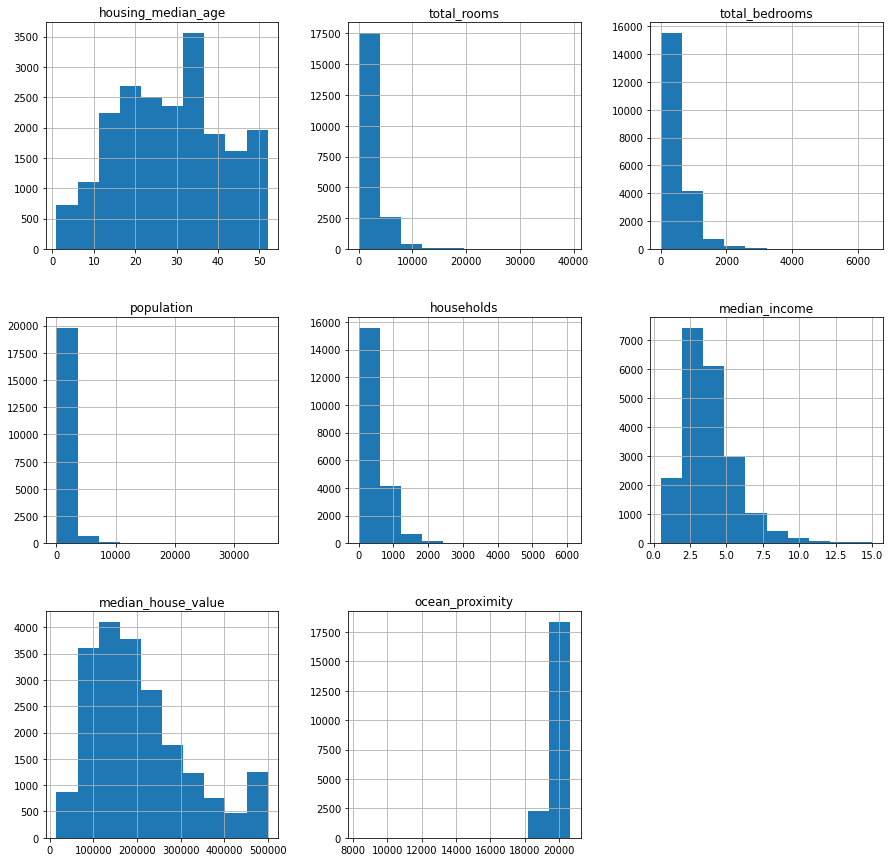

In [ ]:
# plot the hist for the dataframe 
main_df.hist(figsize=(15,15))

# Split the dataset to 20% for testing and 80% for training.

In [ ]:
# split the dataset to x and y 
x=main_df.loc[:,main_df.columns!='median_house_value']
y=main_df['median_house_value']

In [ ]:
# np.array(y).reshape(-1,1) test due to error

In [ ]:
# normalize the values of x and y
Normalizer=preprocessing.MinMaxScaler() #take the minmax normalizer
x_normaliz=Normalizer.fit_transform(x)  #convert x with respect to that new scaler
y_normaliz=Normalizer.fit_transform(np.array(y).reshape(-1,1))

print(type(x_normaliz),type(y_normaliz)) #checking the data type

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bbd075890>,
      dtype=object)

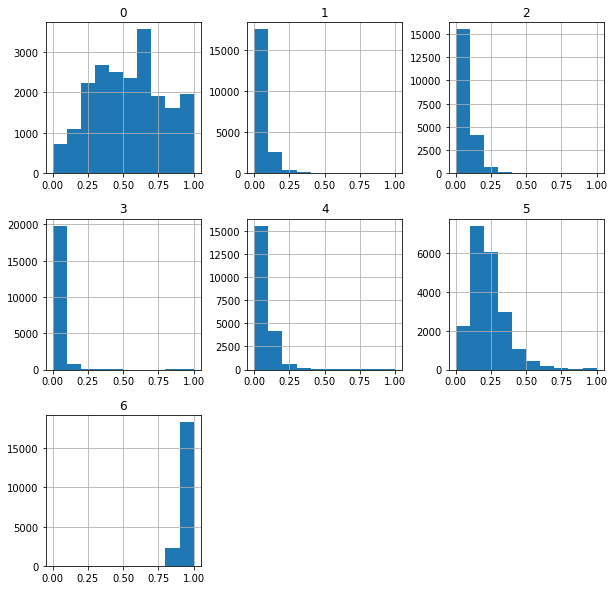

In [ ]:
# plot the hist for the normalized x 
pd.DataFrame(x_normaliz).hist(figsize=(10,10))

In [ ]:
# split the data to train and test 
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_normaliz,y_normaliz,test_size=0.2,random_state=42)


# Create and train 4 Machine Learning models.


using Linear SVM

In [ ]:
model_1 = svm.SVR(C=100,kernel='linear')
model_1.fit(x_train,y_train)

yp_LSVM=model_1.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


using RBF SVM

In [ ]:
model_2 = svm.SVR(C=200,kernel='rbf',gamma='scale')
model_2.fit(x_train,y_train)

yp_RBFSVM=model_2.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


using linear regression

In [ ]:
model_3 = linear_model.LinearRegression()
model_3.fit(x_train,y_train)

yp_LR=model_3.predict(x_test)

using KNN

In [ ]:
model_4 = KNeighborsRegressor(n_neighbors=10)
model_4.fit(x_train,y_train)

yp_knn=model_4.predict(x_test)

using Random Forest

In [ ]:
model_5=RandomForestRegressor(random_state=42,n_estimators=200)
model_5.fit(x_train,y_train)

yp_RF=model_5.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


using desion tree

In [ ]:
model_6 = DecisionTreeRegressor(max_depth=5)
model_6.fit(x_train,y_train)

yp_DT=model_6.predict(x_test)

# Use the right evaluation metrics to choose the best model.

In [ ]:
Allms={'R-2 scores':[metrics.r2_score(y_test,yp_LSVM),metrics.r2_score(y_test,yp_RBFSVM),metrics.r2_score(y_test,yp_LR),metrics.r2_score(y_test,yp_knn),metrics.r2_score(y_test,yp_RF),metrics.r2_score(y_test,yp_DT)],'MSE':[metrics.mean_squared_error(y_test,yp_LSVM),metrics.mean_squared_error(y_test,yp_RBFSVM),metrics.mean_squared_error(y_test,yp_LR),metrics.mean_squared_error(y_test,yp_knn),metrics.mean_squared_error(y_test,yp_RF),metrics.mean_squared_error(y_test,yp_DT)]}
Met_DF=pd.DataFrame(Allms,index=['model_1','model_2','model_3','model_4','model_5','model_6'])
Met_DF

,R-2 scores,MSE
model_1,0.550236,0.025056
model_2,0.657984,0.019053
model_3,0.555316,0.024773
model_4,0.598861,0.022347
model_5,0.693155,0.017094
model_6,0.602075,0.022168


In [ ]:
print(f"Model has the Max R2 score: {Met_DF[Met_DF['R-2 scores']==Met_DF['R-2 scores'].max()].index.values[0]}\nModel has Min MSE: {Met_DF[Met_DF['MSE']==Met_DF['MSE'].min()].index.values[0]}")

Model has the Max R2 score: model_5
Model has Min MSE: model_5


**So we saw that the best one is model_5 of Random Forest**